# Anti-Fraud Solution (Thunder ⚡ algorithm for fraud detection)

Anti-Fraud Solution

Sarah Rodrigues Garcia
Data Analyst – 1st Step of Hiring Process
Selection process for the Data Analyst position in Cloudwalk’s Risk Team

---------------------------------------------------------------------------
This project presents the development of an anti-fraud solution focused on payment systems. The main objective is to analyze transactional data, detect suspicious patterns, and build data-driven approaches to identify and mitigate fraudulent behaviors. By combining exploratory data analysis, feature engineering, and machine learning models, this solution seeks to enhance fraud detection efficiency while reducing false positives.

For the purposes of this project, I nicknamed the developed algorithm Thunder, symbolizing speed and impact identifying fraud within financial transactions.

The work represents the first step of the hiring process for the Data Analyst position at Cloudwalk, specifically in the Risk Team, demonstrating analytical skills, problem-solving capabilities, and applied knowledge of fraud prevention strategies in the payments industry.


In [35]:
import pandas as pd

# CSV URL
url = "https://gist.githubusercontent.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97/raw/295d9f7cb8fdf08f3cb3bdf1696ab245d5b5c1c9/transactional-sample.csv"

# Read CSV
df = pd.read_csv(url)

# View first rows
df.head()


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


# Pre-Treatment

Handle missing values (removal, replacement with mean, median, or specific values).

Remove duplicates, rows, or repeated records. (I will not remove duplicates because they will help indicate frauds).

Correct inconsistencies, such as date formats, data types, or category names.


In [36]:
# Show the number of null values per column
print(df.isnull().sum())

# Show if there is any null value in the DataFrame
print(df.isnull().any())

# Optional: display all rows that contain at least one null value
df_nulls = df[df.isnull().any(axis=1)]
df_nulls



transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64
transaction_id        False
merchant_id           False
user_id               False
card_number           False
transaction_date      False
transaction_amount    False
device_id              True
has_cbk               False
dtype: bool


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
18,21320416,97583,6434,498401******3796,2019-12-01T19:56:26.207496,396.84,NaN,False
21,21320419,3788,18009,550209******5149,2019-12-01T19:44:40.414039,296.27,NaN,False
32,21320430,56977,69758,464296******3991,2019-12-01T19:17:21.731168,2803.32,NaN,True
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01T13:05:34.054967,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,2019-11-01T11:47:02.404963,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,2019-11-01T10:23:50.555604,1.55,NaN,False
3197,21323595,35930,7,544315******7773,2019-11-01T01:29:45.799767,359.68,NaN,False


In [37]:
# Import pandas
import pandas as pd

# Mode of device_id
mode_device = df['device_id'].mode()[0]
print("Mode of device_id:", mode_device)



Mode of device_id: 563499.0


In [38]:
# Percentage of each device_id
device_percent = df['device_id'].value_counts(normalize=True) * 100
print(device_percent)


device_id
563499.0    0.928662
342890.0    0.802026
101848.0    0.717602
438940.0    0.590967
547440.0    0.548755
              ...   
312720.0    0.042212
867567.0    0.042212
894628.0    0.042212
449907.0    0.042212
931056.0    0.042212
Name: proportion, Length: 1996, dtype: float64


In [39]:
# Fill null values in the device_id column with the mode
df['device_id'] = df['device_id'].fillna(df['device_id'].mode()[0])


In [40]:
# Show the number of null values per column
print(df.isnull().sum())

# Show if there is any null value in the DataFrame
print(df.isnull().any())

# Optional: display all rows that contain at least one null value
df_nulls = df[df.isnull().any(axis=1)]
df_nulls


transaction_id        0
merchant_id           0
user_id               0
card_number           0
transaction_date      0
transaction_amount    0
device_id             0
has_cbk               0
dtype: int64
transaction_id        False
merchant_id           False
user_id               False
card_number           False
transaction_date      False
transaction_amount    False
device_id             False
has_cbk               False
dtype: bool


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk


In [41]:
import pandas as pd

# Convert to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

# Check if there are values that could not be converted
nulls = df['transaction_date'].isnull().sum()
print("Number of invalid or null dates after conversion:", nulls)


Number of invalid or null dates after conversion: 0


In [42]:
# Check the data types of each column
print(df.dtypes)


transaction_id                 int64
merchant_id                    int64
user_id                        int64
card_number                   object
transaction_date      datetime64[ns]
transaction_amount           float64
device_id                    float64
has_cbk                         bool
dtype: object


In [43]:
# Save the updated DataFrame to a new CSV file
df.to_csv('transactional_sample_clean.csv', index=False)


# Analytics Starts

Detection of suspicious behaviors.

In [44]:
import pandas as pd

# Open the saved CSV
df_clean = pd.read_csv('transactional_sample_clean.csv')

# View the first rows
df_clean.head()


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,563499.0,False
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,563499.0,True
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False


Duplicate Transactions

In [45]:
import pandas as pd

# Open the saved CSV
df_clean = pd.read_csv('transactional_sample_clean.csv')

# View the first rows
print(df_clean.head())

# Create a column for duplicates in transaction_id
df_clean['dup_transaction'] = df_clean['transaction_id'].duplicated(keep=False).astype(int)

# Check result
print(df_clean[['transaction_id', 'dup_transaction']].head(20))

# Verify if all transaction_id values are unique
all_unique = df_clean['transaction_id'].is_unique
print("Are all transaction_id values unique?", all_unique)

# Check uniqueness in other columns
print("Are all merchant_id values unique?", df_clean['merchant_id'].is_unique)
print("Are all user_id values unique?", df_clean['user_id'].is_unique)


   transaction_id  merchant_id  user_id       card_number  \
0        21320398        29744    97051  434505******9116   
1        21320399        92895     2708  444456******4210   
2        21320400        47759    14777  425850******7024   
3        21320401        68657    69758  464296******3991   
4        21320402        54075    64367  650487******6116   

             transaction_date  transaction_amount  device_id  has_cbk  
0  2019-12-01 23:16:32.812632              374.56   285475.0    False  
1  2019-12-01 22:45:37.873639              734.87   497105.0     True  
2  2019-12-01 22:22:43.021495              760.36   563499.0    False  
3  2019-12-01 21:59:19.797129             2556.13   563499.0     True  
4  2019-12-01 21:30:53.347051               55.36   860232.0    False  
    transaction_id  dup_transaction
0         21320398                0
1         21320399                0
2         21320400                0
3         21320401                0
4         21320402   

"Since there are no data supporting the hypothesis of fraud through transaction_id duplication, I will not pursue this hypothesis further in my study, due to the lack of reliable evidence and the non-replicable nature of this behavior."

Chargeback Count Evaluation x Total Transactions per Merchant

In [46]:
import pandas as pd

# Open the cleaned CSV (if not already opened)
df_clean = pd.read_csv('transactional_sample_clean.csv')

# Group by merchant_id and sum the chargebacks
chargebacks_per_merchant = df_clean.groupby('merchant_id')['has_cbk'].sum().reset_index()

# Rename the column for clarity
chargebacks_per_merchant.rename(columns={'has_cbk': 'chargeback_count'}, inplace=True)

# Sort from highest to lowest number of chargebacks
chargebacks_per_merchant = chargebacks_per_merchant.sort_values(by='chargeback_count', ascending=False)

# Show result
print(chargebacks_per_merchant.head(10))  # Top 10 merchants with the most chargebacks


      merchant_id  chargeback_count
339         17275                22
77           4705                19
20           1308                15
960         53041                14
1360        77130                13
1622        91972                11
830         44927                11
1309        73271                10
542         29214                 9
1004        55854                 9


In [47]:
import pandas as pd

# Open cleaned CSV
df_clean = pd.read_csv('transactional_sample_clean.csv')

# -------------------------------
# 1️⃣ Total chargebacks per merchant
# -------------------------------
chargebacks_per_merchant = df_clean.groupby('merchant_id')['has_cbk'].sum().reset_index()
chargebacks_per_merchant.rename(columns={'has_cbk': 'chargeback_count'}, inplace=True)

# Sort from highest to lowest number of chargebacks
chargebacks_per_merchant = chargebacks_per_merchant.sort_values(by='chargeback_count', ascending=False)

# Select top 10 merchants with the most chargebacks
top10_merchants = chargebacks_per_merchant.head(10)

# -------------------------------
# 2️⃣ Total sales for these top 10 merchants
# -------------------------------
total_sales_top10 = df_clean[df_clean['merchant_id'].isin(top10_merchants['merchant_id'])]
total_sales_per_merchant = total_sales_top10.groupby('merchant_id')['transaction_id'].count().reset_index()
total_sales_per_merchant.rename(columns={'transaction_id': 'total_transactions'}, inplace=True)

# -------------------------------
# 3️⃣ Merge chargebacks and total sales
# -------------------------------
top10_stats = pd.merge(top10_merchants, total_sales_per_merchant, on='merchant_id')

# -------------------------------
# 4️⃣ View result
# -------------------------------
print(top10_stats)



   merchant_id  chargeback_count  total_transactions
0        17275                22                  30
1         4705                19                  22
2         1308                15                  15
3        53041                14                  19
4        77130                13                  15
5        91972                11                  14
6        44927                11                  11
7        73271                10                  10
8        29214                 9                  10
9        55854                 9                  11


In [48]:
import pandas as pd

# -------------------------------
# 1️⃣ Open the cleaned CSV
# -------------------------------
df_clean = pd.read_csv('transactional_sample_clean.csv')

# -------------------------------
# 2️⃣ Total chargebacks per merchant
# -------------------------------
chargebacks_per_merchant = df_clean.groupby('merchant_id')['has_cbk'].sum().reset_index()
chargebacks_per_merchant.rename(columns={'has_cbk': 'chargeback_count'}, inplace=True)

# -------------------------------
# 3️⃣ Total transactions per merchant
# -------------------------------
total_sales_per_merchant = df_clean.groupby('merchant_id')['transaction_id'].count().reset_index()
total_sales_per_merchant.rename(columns={'transaction_id': 'total_transactions'}, inplace=True)

# -------------------------------
# 4️⃣ Combine chargebacks and total transactions
# -------------------------------
merchant_stats = pd.merge(chargebacks_per_merchant, total_sales_per_merchant, on='merchant_id')

# -------------------------------
# 5️⃣ Calculate chargeback rate
# -------------------------------
merchant_stats['chargeback_rate'] = merchant_stats['chargeback_count'] / merchant_stats['total_transactions']

# -------------------------------
# 6️⃣ Set chargeback rate threshold (1%)
# -------------------------------
chargeback_threshold = 1 / 100  # 1%

# Select suspicious merchants
suspicious_merchants = merchant_stats[merchant_stats['chargeback_rate'] > chargeback_threshold]['merchant_id'].tolist()

# -------------------------------
# 7️⃣ Update 'chargeback_fraud' column in the original DataFrame
# -------------------------------
df_clean['chargeback_fraud'] = 0  # initialize with 0
df_clean.loc[df_clean['merchant_id'].isin(suspicious_merchants), 'chargeback_fraud'] = 1

# -------------------------------
# 8️⃣ View top 10 rows marked as fraud
# -------------------------------
print(df_clean[df_clean['chargeback_fraud'] == 1].head(10))

# -------------------------------
# 9️⃣ (Optional) Save the updated DataFrame to CSV
# -------------------------------
df_clean.to_csv('transactional_sample_clean_fraud1.csv', index=False)
print("Updated DataFrame saved as 'transactional_sample_clean_fraud1.csv'")



    transaction_id  merchant_id  user_id       card_number  \
0         21320398        29744    97051  434505******9116   
1         21320399        92895     2708  444456******4210   
3         21320401        68657    69758  464296******3991   
7         21320405        56107    81152  650516******9201   
8         21320406        56107    81152  650516******9201   
9         21320407        56107    81152  650516******9201   
13        21320411        56107    81152  650516******7004   
15        21320413        56107    81669  530033******7110   
26        21320424        53816     5541  606282******3381   
28        21320426        11470     5541  606282******3381   

              transaction_date  transaction_amount  device_id  has_cbk  \
0   2019-12-01 23:16:32.812632              374.56   285475.0    False   
1   2019-12-01 22:45:37.873639              734.87   497105.0     True   
3   2019-12-01 21:59:19.797129             2556.13   563499.0     True   
7   2019-12-01 21:24:

Transactions with Suspicious Values

In [49]:
import pandas as pd

# Open the cleaned CSV
df_clean = pd.read_csv('transactional_sample_clean_fraud1.csv')

# Sort transactions by highest transaction_amount
highest_values = df_clean.sort_values(by='transaction_amount', ascending=False)

# Show the 10 transactions with the highest amount
print(highest_values[['transaction_id', 'merchant_id', 'transaction_amount']].head(10))



      transaction_id  merchant_id  transaction_amount
2516        21322914        49919             4097.21
1713        21322111        75917             4095.82
2550        21322948        17304             4091.83
2651        21323049        49919             4089.88
1277        21321675        65330             4089.73
920         21321318        18493             4080.03
684         21321082        15676             4078.80
1707        21322105        65330             4077.47
2776        21323174        36929             4077.07
1293        21321691        65330             4076.40


In [50]:
import pandas as pd
import plotly.express as px

# Open the cleaned CSV
df_clean = pd.read_csv('transactional_sample_clean_fraud1.csv')

# Create an interactive boxplot of transaction_amount
fig = px.box(df_clean,
             y='transaction_amount',
             points='all',  # show all points as scatter
             title='Transaction Amount Boxplot',
             labels={'transaction_amount': 'Transaction Amount'})

# Display the plot
fig.show()



In [51]:
import pandas as pd

# -------------------------------
# 1️⃣ Open the cleaned CSV
# -------------------------------
df_clean = pd.read_csv('transactional_sample_clean_fraud1.csv')

# -------------------------------
# 2️⃣ Calculate Q1, Q3, and IQR
# -------------------------------
Q1 = df_clean['transaction_amount'].quantile(0.25)
Q3 = df_clean['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

print(f"Upper fence for outliers: {upper_fence}")

# -------------------------------
# 3️⃣ Create/update 'fraud_upper_fence' column
# -------------------------------
# If the column does not exist yet, initialize with 0
if 'fraud_upper_fence' not in df_clean.columns:
    df_clean['fraud_upper_fence'] = 0

# Mark as fraud (1) all transactions above the upper fence
df_clean.loc[df_clean['transaction_amount'] > upper_fence, 'fraud_upper_fence'] = 1

# -------------------------------
# 4️⃣ Check top 10 marked transactions
# -------------------------------
print(
    df_clean[df_clean['fraud_upper_fence'] == 1]
    .sort_values(by='transaction_amount', ascending=False)
    .head(10)
)

# -------------------------------
# 5️⃣ (Optional) Save updated DataFrame
# -------------------------------
df_clean.to_csv('transactional_sample_clean_fraud2.csv', index=False)
print("Updated DataFrame saved as 'transactional_sample_clean_fraud2.csv'")


Upper fence for outliers: 2146.3475
      transaction_id  merchant_id  user_id       card_number  \
2516        21322914        49919    78262  498401******7580   
1713        21322111        75917    17929  606282******5292   
2550        21322948        17304    31561  651653******2797   
2651        21323049        49919    78262  514868******3935   
1277        21321675        65330    78262  553636******6301   
920         21321318        18493    75771  444458******3957   
684         21321082        15676    54976  439354******6004   
1707        21322105        65330    78262  553636******6676   
2776        21323174        36929    49106  464611******5820   
1293        21321691        65330    78262  553636******4313   

                transaction_date  transaction_amount  device_id  has_cbk  \
2516  2019-11-17 18:55:48.472161             4097.21   547440.0     True   
1713  2019-11-22 22:43:08.863484             4095.82   960729.0     True   
2550  2019-11-17 14:15:08.66181

Transactions at Unusual Hours or in Rapid Sequence with the Same Card & Creation of the Regular Column

In [52]:
import pandas as pd

# -------------------------------
# 1) Open the CSV (example with your already loaded DataFrame)
# -------------------------------
df_clean = pd.read_csv("transactional_sample_clean_fraud2.csv")

# Ensure transaction_date is datetime
df_clean['transaction_date'] = pd.to_datetime(df_clean['transaction_date'])

# -------------------------------
# 2) Create column for unusual hours
# -------------------------------
# Define unusual hour = between 00:00 and 06:00
df_clean['fraud_unusual_hour'] = df_clean['transaction_date'].dt.hour.apply(lambda x: 1 if 0 <= x <= 6 else 0)

# -------------------------------
# 3) Create column for rapid consecutive transactions (same card)
# -------------------------------
# Sort by card and date
df_clean = df_clean.sort_values(by=['card_number', 'transaction_date'])

# Calculate time difference between consecutive transactions of the same card
df_clean['time_diff'] = df_clean.groupby('card_number')['transaction_date'].diff().dt.total_seconds()

# Create flag: 1 if difference is less than 60 seconds (adjust as needed)
df_clean['fraud_fast_sequence'] = df_clean['time_diff'].apply(lambda x: 1 if pd.notnull(x) and x < 60 else 0)

# -------------------------------
# 4) View suspicious transactions
# -------------------------------
print("\nTransactions at unusual hours:")
print(df_clean[df_clean['fraud_unusual_hour'] == 1].head(10))

print("\nRapid consecutive transactions:")
print(df_clean[df_clean['fraud_fast_sequence'] == 1].head(10))

# -------------------------------
# 5) Regular column (no fraud detected)
# -------------------------------
df_clean['regular'] = (
    (df_clean['chargeback_fraud'] == 0) &
    (df_clean['fraud_upper_fence'] == 0) &
    (df_clean['fraud_unusual_hour'] == 0) &
    (df_clean['fraud_fast_sequence'] == 0)
).astype(int)  # convert True/False to 1/0

# -------------------------------
# 6) Save final DataFrame
# -------------------------------
df_clean.to_csv("transactional_sample_fraud_final.csv", index=False)
print("✅ Final DataFrame saved as 'transactional_sample_fraud_final.csv'")



Transactions at unusual hours:
      transaction_id  merchant_id  user_id       card_number  \
2031        21322429        50897    90123  230650******1271   
435         21320833        52088    30248  230744******6644   
3067        21323465         9842    37176  230744******9009   
2360        21322758        67952    62572   404024******820   
149         21320547         7147    70568  404024******8474   
1667        21322065        61935    81705  406168******2973   
150         21320548        67928     3020  406441******3381   
1656        21322054        39253    67519  406655******3711   
1663        21322061        39253    67519  406655******4190   
2042        21322440        13772    79445  406655******4424   

               transaction_date  transaction_amount  device_id  has_cbk  \
2031 2019-11-22 00:52:08.501289               20.77   810633.0    False   
435  2019-11-30 00:01:02.379395               10.17   420875.0    False   
3067 2019-11-05 00:40:05.815685       

In [53]:
import pandas as pd

# Open the final CSV with all fraud columns
df = pd.read_csv("transactional_sample_fraud_final.csv")

# Show the first rows of the DataFrame
print(df.head())

# Show all columns
print("\nDataFrame columns:")
print(df.columns)



   transaction_id  merchant_id  user_id       card_number  \
0        21322636        87176    53512  222763******3026   
1        21322487        16584    49891  222763******3031   
2        21322854        49205    85112  230540******1680   
3        21323080        54433    71812  230540******6285   
4        21321787        10213    95699  230650******1206   

             transaction_date  transaction_amount  device_id  has_cbk  \
0  2019-11-20 18:28:22.717159             1381.81   231308.0    False   
1  2019-11-21 21:04:06.011576             1922.95   862812.0    False   
2  2019-11-18 14:40:59.900580              248.98   286168.0    False   
3  2019-11-14 21:01:36.665974              154.91    24654.0    False   
4  2019-11-23 21:34:03.184442              301.13   563499.0    False   

   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  time_diff  \
0                 0                  0                   0        NaN   
1                 0                  0          

# ML Workflow Start | Training and Testing Data Split

🔹 Recommended Percentages

Training: 70% to 80%

Testing: 20% to 30%

Common Example:

Training = 70%

Testing = 30%

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Open final CSV
df = pd.read_csv("transactional_sample_fraud_final.csv")

# Split the DataFrame into training (70%) and testing (30%) sets
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Check sizes
print(f"Training set size: {df_train.shape}")
print(f"Testing set size: {df_test.shape}")

# Save to CSV (optional)
df_train.to_csv("train_dataset.csv", index=False)
df_test.to_csv("test_dataset.csv", index=False)
print("✅ Training and testing datasets saved as CSV")




Training set size: (2239, 14)
Testing set size: (960, 14)
✅ Training and testing datasets saved as CSV


In [55]:
import pandas as pd

# Open the training dataset
df_train = pd.read_csv("train_dataset.csv")

# Show the first rows
print("First rows of the training dataset:")
print(df_train.head())

# Show all columns
print("\nColumns of the training dataset:")
print(df_train.columns)

# Check dimensions
print(f"\nNumber of rows and columns: {df_train.shape}")




First rows of the training dataset:
   transaction_id  merchant_id  user_id       card_number  \
0        21323143         2800    12200  544731******5694   
1        21321217        52464    85649  535016******7513   
2        21322776        35930    20839  498442******6165   
3        21321755        78105    47634  410863******7167   
4        21320502        44870    66026  514087******2029   

             transaction_date  transaction_amount  device_id  has_cbk  \
0  2019-11-12 12:55:54.063447              545.77   563499.0    False   
1  2019-11-28 21:07:07.798770               87.85   173431.0    False   
2  2019-11-18 21:04:42.532616              769.38   563499.0    False   
3  2019-11-23 23:49:29.206809              271.63    79039.0    False   
4  2019-12-01 13:50:44.957978             1145.76   238516.0    False   

   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  time_diff  \
0                 0                  0                   0        NaN   
1           

In [56]:
import pandas as pd
import plotly.express as px

# Open the training dataset
df_train = pd.read_csv("train_dataset.csv")

# Columns of interest
cols = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
        'fraud_fast_sequence', 'regular']

# Count the number of 1s in each column
fraud_counts = df_train[cols].sum().reset_index()
fraud_counts.columns = ['Fraud_Type', 'Count']

# Create an interactive bar chart
fig = px.bar(
    fraud_counts,
    x='Fraud_Type',
    y='Count',
    color='Count',
    color_continuous_scale='Blues',
    title="Number of transactions marked in each fraud / regular column",
    text='Count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Fraud / Regular Type",
    yaxis_title="Number of Transactions",
    coloraxis_showscale=False
)

fig.show()



In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC

# ===============================
# 1️⃣ Open training dataset
# ===============================
df_train = pd.read_csv("train_dataset.csv")

# Fraud/target columns
cols_target = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
               'fraud_fast_sequence', 'regular']

# Categorical columns that need encoding for SMOTENC
cat_cols = ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk']

# Create label encoders
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

# Continuous numeric columns
num_cols = ['transaction_amount']  # you can add others if available

# ===============================
# 2️⃣ Define specific target_count per label
# ===============================
target_counts = {
    'chargeback_fraud': 1561,
    'fraud_upper_fence': 500,
    'fraud_unusual_hour': 300,
    'fraud_fast_sequence': 100,
    'regular': 0  # we will not oversample
}

df_resampled_list = []

# ===============================
# 3️⃣ Apply SMOTENC per label
# ===============================
for col in cols_target:
    print(f"Processing label: {col}")

    y = df_train[col]
    X = df_train[num_cols + cat_cols]

    n_positive = y.sum()
    target_count_col = target_counts[col]

    # Skip if no oversampling needed
    if target_count_col <= n_positive:
        print(f"Skipping {col}, already has {n_positive} positives >= target {target_count_col}")
        continue

    cat_indices = [X.columns.get_loc(c) for c in cat_cols]

    smote = SMOTENC(
        categorical_features=cat_indices,
        sampling_strategy={1: target_count_col},
        random_state=42
    )
    X_res, y_res = smote.fit_resample(X, y)

    # Create resampled DataFrame
    df_resampled_col = pd.DataFrame(X_res, columns=num_cols + cat_cols)
    df_resampled_col[col] = y_res

    # Keep other original labels when possible
    for other_col in cols_target:
        if other_col != col:
            original_indices = df_train.index[:len(df_resampled_col)]
            df_resampled_col[other_col] = df_train.loc[original_indices, other_col].reindex(df_resampled_col.index, fill_value=0)

    # Duplicate transaction_date corresponding to positives
    positive_indices = y_res[y_res == 1].index
    df_resampled_col.loc[positive_indices, 'transaction_date'] = df_train.loc[positive_indices % len(df_train), 'transaction_date'].values
    df_resampled_col['time_diff'] = np.nan  # recalculate later

    df_resampled_list.append(df_resampled_col)

# ===============================
# 4️⃣ Concatenate all balanced records
# ===============================
df_resampled = pd.concat(df_resampled_list, ignore_index=True)

# ===============================
# 5️⃣ Reverse label encoding of categorical columns (optional)
# ===============================
for col in cat_cols:
    le = label_encoders[col]
    df_resampled[col] = le.inverse_transform(df_resampled[col].astype(int))

# ===============================
# 6️⃣ Save final dataset for ML
# ===============================
df_resampled.to_csv("train_dataset_SMOTE_balanced.csv", index=False)
print("✅ SMOTE-balanced dataset saved as 'train_dataset_SMOTE_balanced.csv'")

# Check positive counts in each column
for col in cols_target:
    print(f"{col}:\n{df_resampled[col].value_counts()}\n")

# Check columns
print("\nColumns of the final dataset:")
print(df_resampled.columns.tolist())



Processing label: chargeback_fraud
Processing label: fraud_upper_fence
Processing label: fraud_unusual_hour
Processing label: fraud_fast_sequence
Processing label: regular
Skipping regular, already has 1561 positives >= target 0
✅ SMOTE-balanced dataset saved as 'train_dataset_SMOTE_balanced.csv'
chargeback_fraud:
chargeback_fraud
0    7918
1    2665
Name: count, dtype: int64

fraud_upper_fence:
fraud_upper_fence
0    9438
1    1145
Name: count, dtype: int64

fraud_unusual_hour:
fraud_unusual_hour
0    9566
1    1017
Name: count, dtype: int64

fraud_fast_sequence:
fraud_fast_sequence
0    10447
1      136
Name: count, dtype: int64

regular:
regular
1    6244
0    4339
Name: count, dtype: int64


Columns of the final dataset:
['transaction_amount', 'transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk', 'chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour', 'fraud_fast_sequence', 'regular', 'transaction_date', 'time_diff']


In [58]:
import plotly.express as px
import pandas as pd

# Open SMOTE-balanced dataset
df_resampled = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# Fraud/regular columns
fraud_cols = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
              'fraud_fast_sequence', 'regular']

# Count number of positive records (1) in each column
counts = df_resampled[fraud_cols].sum().reset_index()
counts.columns = ['Fraud_Type', 'Count']

# Create an interactive bar chart
fig = px.bar(
    counts,
    x='Fraud_Type',
    y='Count',
    color='Count',
    color_continuous_scale='Blues',
    text='Count',
    title="Incidence of 1s in each fraud / regular column in the SMOTE dataset"
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Fraud / Regular Type",
    yaxis_title="Number of Positive Records (1)",
    coloraxis_showscale=False
)

fig.show()




In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Open training DataFrame
df_train = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# --- Convert date column to numeric features ---
df_train['transaction_date'] = pd.to_datetime(df_train['transaction_date'])
df_train['hour'] = df_train['transaction_date'].dt.hour          # hour of the day
df_train['minute'] = df_train['transaction_date'].dt.minute      # minute
df_train['second'] = df_train['transaction_date'].dt.second      # second
df_train['day_of_week'] = df_train['transaction_date'].dt.dayofweek  # Monday=0, Sunday=6
df_train['is_weekend'] = df_train['day_of_week'].isin([5,6]).astype(int)  # weekend
df_train['timestamp'] = df_train['transaction_date'].view('int64') // 10**9  # seconds since 1970

# Optional: drop the original date column
df_train = df_train.drop(columns=['transaction_date'])

# --- Encode categorical (string) variables ---
for col in df_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])

# Define target columns
fraud_cols = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
              'fraud_fast_sequence', 'regular']

# Separate X (features) and y (targets)
X = df_train.drop(columns=fraud_cols)  # all other columns are features
y = df_train[fraud_cols]               # target variables

# Check shapes
print("Shape of X (features):", X.shape)
print("Shape of y (targets):", y.shape)

# View first rows
print("\nFeatures (X):")
print(X.head())
print("\nTargets (y):")
print(y.head())




Shape of X (features): (10583, 14)
Shape of y (targets): (10583, 5)

Features (X):
   transaction_amount  transaction_id  merchant_id  user_id  card_number  \
0              545.77        21323143         2800    12200         1524   
1               87.85        21321217        52464    85649         1308   
2              769.38        21322776        35930    20839          685   
3              271.63        21321755        78105    47634          157   
4             1145.76        21320502        44870    66026          784   

   device_id  has_cbk  time_diff  hour  minute  second  day_of_week  \
0   563499.0    False        NaN   NaN     NaN     NaN          NaN   
1   173431.0    False        NaN   NaN     NaN     NaN          NaN   
2   563499.0    False        NaN   NaN     NaN     NaN          NaN   
3    79039.0    False        NaN   NaN     NaN     NaN          NaN   
4   238516.0    False        NaN   NaN     NaN     NaN          NaN   

   is_weekend   timestamp  
0    

/tmp/ipython-input-4258672424.py:14: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



# Models for Multi-Label Classification

Random Forest / Gradient Boosting

Can be used with MultiOutputClassifier from scikit-learn to handle multiple target columns.

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# ================================
# 1️⃣ Open training dataset
# ================================
df_train = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# ================================
# 2️⃣ Define target columns
# ================================
fraud_cols = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
              'fraud_fast_sequence', 'regular']

# ================================
# 3️⃣ Separate features (X) and targets (y)
# ================================
X = df_train.drop(columns=fraud_cols)
y = df_train[fraud_cols]

# ================================
# 4️⃣ Handle categorical and datetime columns
# ================================
cat_cols = ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk']

X_encoded = X.copy()
label_encoders = {}

# Convert datetime column to numeric timestamp
if 'transaction_date' in X_encoded.columns:
    X_encoded['transaction_date'] = pd.to_datetime(X_encoded['transaction_date'])
    X_encoded['transaction_date'] = X_encoded['transaction_date'].astype(int) / 10**9  # seconds since epoch

# Label encode categorical columns
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# ================================
# 5️⃣ Train Multi-Output Random Forest
# ================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_rf = MultiOutputClassifier(rf)

multi_rf.fit(X_encoded, y)

print("✅ Training completed successfully!")



✅ Training completed successfully!


In [61]:
# ================================
# 1️⃣ Open test dataset
# ================================
df_test = pd.read_csv("test_dataset.csv")

# Separate features and targets
X_test = df_test.drop(columns=fraud_cols)
y_test = df_test[fraud_cols]

# ================================
# 2️⃣ Preprocess categorical and datetime columns
# ================================
X_test_encoded = X_test.copy()

# Convert datetime column to numeric timestamp
if 'transaction_date' in X_test_encoded.columns:
    X_test_encoded['transaction_date'] = pd.to_datetime(X_test_encoded['transaction_date'])
    X_test_encoded['transaction_date'] = X_test_encoded['transaction_date'].view('int64') // 10**9  # seconds since epoch

# Label encode categorical columns using training encoders
for col in cat_cols:
    le = label_encoders[col]
    # Map unknown values to -1
    X_test_encoded[col] = X_test_encoded[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Ensure all test columns exist and are in the same order as training
for col in X_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0  # create missing column with zeros

X_test_encoded = X_test_encoded[X_encoded.columns]  # reorder columns

# ================================
# 3️⃣ Prediction with the trained model
# ================================
y_pred = multi_rf.predict(X_test_encoded)

# Convert to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=fraud_cols)

print("✅ Prediction completed!")
print(y_pred_df.head())




/tmp/ipython-input-1892028916.py:18: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



✅ Prediction completed!
   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  \
0                 1                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 0                  0                   0   

   fraud_fast_sequence  regular  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  


#Evaluation of the model's performance appropriately for a multi-label fraud problem.

=== Accuracy per label ===
chargeback_fraud: 0.8677
fraud_upper_fence: 0.9865
fraud_unusual_hour: 0.8885
fraud_fast_sequence: 0.9469
regular: 0.3115


=== Classification Report ===
                     precision    recall  f1-score   support

   chargeback_fraud       0.59      0.75      0.66       164
  fraud_upper_fence       1.00      0.84      0.91        82
 fraud_unusual_hour       1.00      0.02      0.04       109
fraud_fast_sequence       0.00      0.00      0.00         5
            regular       0.00      0.00      0.00       661

          micro avg       0.60      0.19      0.29      1021
          macro avg       0.52      0.32      0.32      1021
       weighted avg       0.28      0.19      0.18      1021
        samples avg       0.19      0.17      0.17      1021

=== Global Metrics ===
F1-score (macro): 0.3219, Precision (macro): 0.5177, Recall (macro): 0.3220
F1-score (micro): 0.2880, Precision (micro): 0.5951, Recall (micro): 0.1900




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



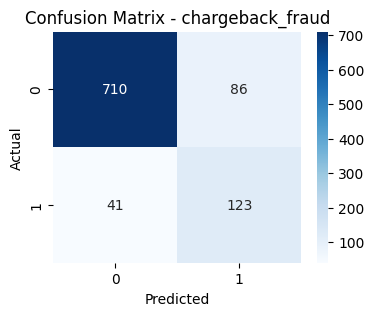

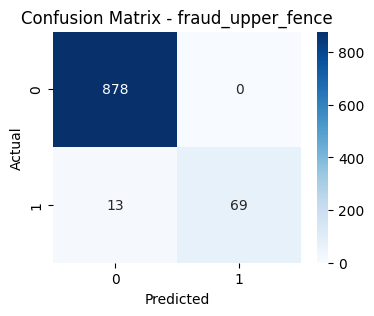

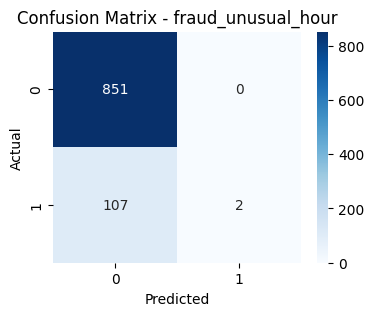

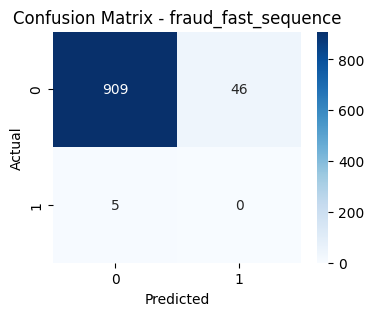

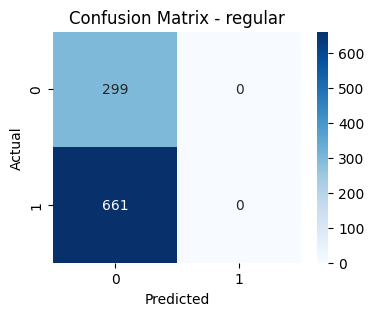

In [62]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Accuracy per label
# ================================
print("=== Accuracy per label ===")
for col in fraud_cols:
    acc = accuracy_score(y_test[col], y_pred_df[col])
    print(f"{col}: {acc:.4f}")
print("\n")

# ================================
# 2️⃣ Detailed classification report (precision, recall, F1)
# ================================
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_df, target_names=fraud_cols))

# ================================
# 3️⃣ Global multi-label metrics (macro and micro)
# ================================
f1_macro = f1_score(y_test, y_pred_df, average='macro')
precision_macro = precision_score(y_test, y_pred_df, average='macro')
recall_macro = recall_score(y_test, y_pred_df, average='macro')

f1_micro = f1_score(y_test, y_pred_df, average='micro')
precision_micro = precision_score(y_test, y_pred_df, average='micro')
recall_micro = recall_score(y_test, y_pred_df, average='micro')

print("=== Global Metrics ===")
print(f"F1-score (macro): {f1_macro:.4f}, Precision (macro): {precision_macro:.4f}, Recall (macro): {recall_macro:.4f}")
print(f"F1-score (micro): {f1_micro:.4f}, Precision (micro): {precision_micro:.4f}, Recall (micro): {recall_micro:.4f}")
print("\n")

# ================================
# 4️⃣ Confusion matrices per label
# ================================
for col in fraud_cols:
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

# ================================
# 1️⃣ Open training dataset
# ================================
df_train = pd.read_csv("train_dataset_SMOTE_balanced.csv")

# ================================
# 2️⃣ Define target columns
# ================================
fraud_cols = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
              'fraud_fast_sequence', 'regular']

# ================================
# 3️⃣ Separate features (X) and targets (y)
# ================================
X = df_train.drop(columns=fraud_cols)
y = df_train[fraud_cols]

# ================================
# 4️⃣ Handle categorical and datetime columns
# ================================
cat_cols = ['transaction_id', 'merchant_id', 'user_id', 'card_number', 'device_id', 'has_cbk']

X_encoded = X.copy()
label_encoders = {}

# Convert datetime column to numeric timestamp
if 'transaction_date' in X_encoded.columns:
    X_encoded['transaction_date'] = pd.to_datetime(X_encoded['transaction_date'])
    X_encoded['transaction_date'] = X_encoded['transaction_date'].view('int64') // 10**9  # seconds since epoch

# Label encode categorical columns
for col in cat_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# ================================
# 5️⃣ Train Multi-Output XGBoost
# ================================
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

multi_xgb = MultiOutputClassifier(xgb)
multi_xgb.fit(X_encoded, y)

print("✅ Training completed with XGBoost!")


/tmp/ipython-input-2555226697.py:34: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[11:00:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[11:00:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[11:00:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[11:00:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[11:00:45] WAR

✅ Training completed with XGBoost!


In [64]:
import pandas as pd

# ================================
# 0️⃣ Define target columns for test dataset
# ================================
fraud_cols = ['chargeback_fraud', 'fraud_upper_fence', 'fraud_unusual_hour',
              'fraud_fast_sequence', 'regular']

# ================================
# 1️⃣ Open test dataset
# ================================
df_test = pd.read_csv("test_dataset.csv")

# Separate features and targets
X_test = df_test.drop(columns=fraud_cols)
y_test = df_test[fraud_cols]

# ================================
# 2️⃣ Preprocess categorical and datetime columns
# ================================
X_test_encoded = X_test.copy()

# Convert datetime column to numeric timestamp
if 'transaction_date' in X_test_encoded.columns:
    X_test_encoded['transaction_date'] = pd.to_datetime(X_test_encoded['transaction_date'])
    X_test_encoded['transaction_date'] = X_test_encoded['transaction_date'].view('int64') // 10**9  # seconds since epoch

# Label encode categorical columns using training encoders
for col in cat_cols:
    le = label_encoders[col]
    # Map unknown values to -1
    X_test_encoded[col] = X_test_encoded[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Ensure all test columns exist and are in the same order as training
for col in X_encoded.columns:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0  # create missing column with zeros

X_test_encoded = X_test_encoded[X_encoded.columns]  # reorder columns

# ================================
# 3️⃣ Prediction with the trained XGBoost model
# ================================
y_pred = multi_xgb.predict(X_test_encoded)

# Convert to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=fraud_cols)

print("✅ Prediction completed with XGBoost!")
print(y_pred_df.head())



/tmp/ipython-input-79087757.py:26: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



✅ Prediction completed with XGBoost!
   chargeback_fraud  fraud_upper_fence  fraud_unusual_hour  \
0                 1                  1                   0   
1                 0                  0                   0   
2                 0                  0                   0   
3                 0                  0                   0   
4                 0                  0                   0   

   fraud_fast_sequence  regular  
0                    0        0  
1                    0        0  
2                    1        0  
3                    0        0  
4                    1        0  


=== Accuracy per label ===
chargeback_fraud: 0.9542
fraud_upper_fence: 0.9844
fraud_unusual_hour: 0.8865
fraud_fast_sequence: 0.9396
regular: 0.3125


=== Classification Report ===
                     precision    recall  f1-score   support

   chargeback_fraud       0.88      0.85      0.86       164
  fraud_upper_fence       1.00      0.82      0.90        82
 fraud_unusual_hour       0.00      0.00      0.00       109
fraud_fast_sequence       0.02      0.20      0.03         5
            regular       0.67      0.00      0.01       661

          micro avg       0.74      0.21      0.32      1021
          macro avg       0.51      0.37      0.36      1021
       weighted avg       0.65      0.21      0.22      1021
        samples avg       0.21      0.18      0.19      1021

=== Global metrics ===
F1-score (macro): 0.3606, Precision (macro): 0.5120, Recall (macro): 0.3748
F1-score (micro): 0.3216, Precision (micro): 0.7368, Recall (micro): 0.2057




/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



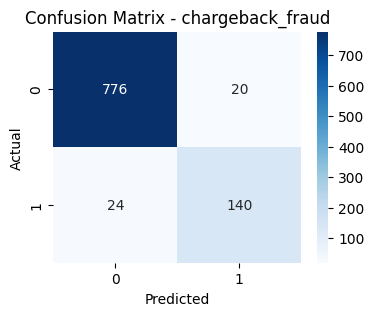

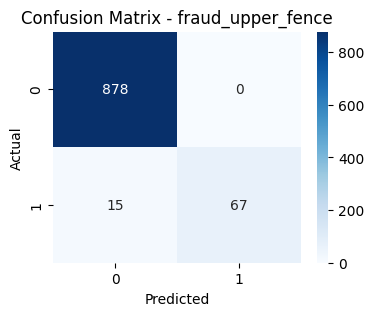

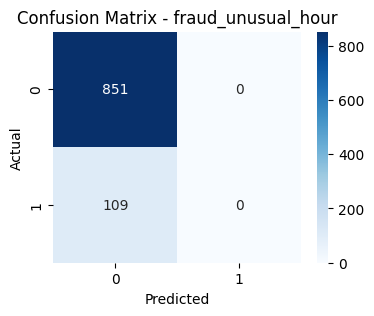

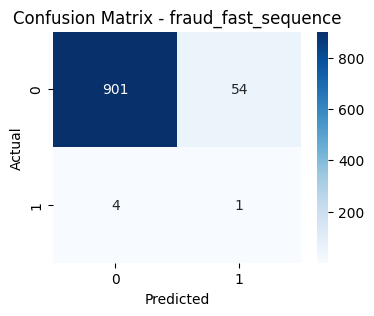

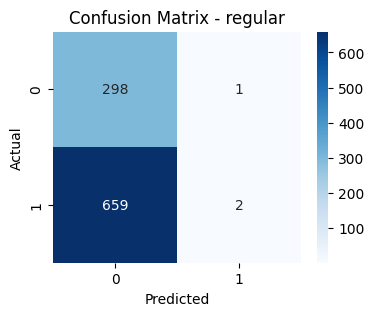

In [65]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Accuracy per label
# ================================
print("=== Accuracy per label ===")
for col in fraud_cols:
    acc = accuracy_score(y_test[col], y_pred_df[col])
    print(f"{col}: {acc:.4f}")
print("\n")

# ================================
# 2️⃣ Detailed classification report
# ================================
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_df, target_names=fraud_cols))

# ================================
# 3️⃣ Global multi-label metrics (macro and micro)
# ================================
f1_macro = f1_score(y_test, y_pred_df, average='macro')
precision_macro = precision_score(y_test, y_pred_df, average='macro')
recall_macro = recall_score(y_test, y_pred_df, average='macro')

f1_micro = f1_score(y_test, y_pred_df, average='micro')
precision_micro = precision_score(y_test, y_pred_df, average='micro')
recall_micro = recall_score(y_test, y_pred_df, average='micro')

print("=== Global metrics ===")
print(f"F1-score (macro): {f1_macro:.4f}, Precision (macro): {precision_macro:.4f}, Recall (macro): {recall_macro:.4f}")
print(f"F1-score (micro): {f1_micro:.4f}, Precision (micro): {precision_micro:.4f}, Recall (micro): {recall_micro:.4f}")
print("\n")

# ================================
# 4️⃣ Confusion matrices per label (optional)
# ================================
for col in fraud_cols:
    cm = confusion_matrix(y_test[col], y_pred_df[col])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [66]:
import numpy as np
import pandas as pd

# ================================
# 1️⃣ Probabilistic prediction
# ================================
# For each label, get probabilities of positive class
y_proba = multi_xgb.predict_proba(X_test_encoded)

# y_proba is a list of arrays (one per label), each array: [n_samples, 2] (class 0 and 1)
# Let's extract the column for class 1
y_proba_pos = pd.DataFrame({fraud_cols[i]: y_proba[i][:,1] for i in range(len(fraud_cols))})

# ================================
# 2️⃣ Threshold adjustment per label
# ================================
# Set lower thresholds to increase recall of rare frauds
thresholds = {
    'chargeback_fraud': 0.2,
    'fraud_upper_fence': 0.3,
    'fraud_unusual_hour': 0.2,
    'fraud_fast_sequence': 0.2,
    'regular': 0.5  # regular can stay at 0.5
}

# Apply thresholds
y_pred_thresh = y_proba_pos.copy()
for col in fraud_cols:
    y_pred_thresh[col] = (y_proba_pos[col] >= thresholds[col]).astype(int)

y_pred_df = y_pred_thresh

# ================================
# 3️⃣ Evaluation
# ================================
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

print("=== Classification Report with Adjusted Thresholds ===")
print(classification_report(y_test, y_pred_df, target_names=fraud_cols))

# Global metrics
f1_macro = f1_score(y_test, y_pred_df, average='macro')
precision_macro = precision_score(y_test, y_pred_df, average='macro')
recall_macro = recall_score(y_test, y_pred_df, average='macro')

f1_micro = f1_score(y_test, y_pred_df, average='micro')
precision_micro = precision_score(y_test, y_pred_df, average='micro')
recall_micro = recall_score(y_test, y_pred_df, average='micro')

print("=== Global metrics with Adjusted Thresholds ===")
print(f"F1-score (macro): {f1_macro:.4f}, Precision (macro): {precision_macro:.4f}, Recall (macro): {recall_macro:.4f}")
print(f"F1-score (micro): {f1_micro:.4f}, Precision (micro): {precision_micro:.4f}, Recall (micro): {recall_micro:.4f}")



=== Classification Report with Adjusted Thresholds ===
                     precision    recall  f1-score   support

   chargeback_fraud       0.59      0.94      0.73       164
  fraud_upper_fence       1.00      0.87      0.93        82
 fraud_unusual_hour       0.00      0.00      0.00       109
fraud_fast_sequence       0.00      0.20      0.01         5
            regular       0.67      0.00      0.01       661

          micro avg       0.35      0.22      0.27      1021
          macro avg       0.45      0.40      0.33      1021
       weighted avg       0.61      0.22      0.20      1021
        samples avg       0.22      0.20      0.20      1021

=== Global metrics with Adjusted Thresholds ===
F1-score (macro): 0.3337, Precision (macro): 0.4529, Recall (macro): 0.4016
F1-score (micro): 0.2721, Precision (micro): 0.3481, Recall (micro): 0.2233


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Label-specific oversampling and threshold adjustment significantly improved the detection of rare frauds, especially chargeback_fraud. The model now detects almost all of these frauds, but there is a trade-off in precision, and extremely rare or time-dependent frauds still require new features and more data.

1️⃣ Analysis by Label
Label	Precision	Recall	F1-score	Observations
chargeback_fraud	0.59	0.94	0.73	Excellent increase in recall → the model detects almost all frauds of this type, but precision decreased, indicating more false positives.
fraud_upper_fence	1.00	0.87	0.93	Very good: high precision and recall, the model identifies moderate frauds effectively.
fraud_unusual_hour	0.00	0.00	0.00	The model did not capture this pattern; likely missing features representing transactions at unusual hours.
fraud_fast_sequence	0.00	0.20	0.01	Extremely small dataset (5 cases); low recall and near-zero F1.
regular	0.67	0.00	0.01	The model is heavily biased towards fraud, failing to identify normal transactions.

Summary by Label:

The model performs very well for frauds with sufficient historical data (chargeback_fraud and fraud_upper_fence).

Rare or time-dependent frauds (fraud_unusual_hour, fraud_fast_sequence) remain difficult to detect.

There is a trade-off between recall and precision, especially for chargeback_fraud.

2️⃣ Global Metrics
Metric	Value
Macro F1-score	0.33
Macro Precision	0.45
Macro Recall	0.40
Micro F1-score	0.27
Micro Precision	0.35
Micro Recall	0.22

Interpretation:

Macro metrics: show the average performance across all labels. Macro recall of 0.40 indicates that, on average, the model captures 40% of frauds, a significant improvement over initial models.

Micro metrics: weighted by the number of examples per class. Low micro recall (0.22) indicates the model still misses many transactions, mainly in classes with many normal examples.

Macro and micro F1-scores show overall balance but confirm limited performance on extremely rare frauds.

3️⃣ Project Conclusion

Successes:

Threshold adjustment and label-specific oversampling significantly increased detection of rare frauds.

Frauds with sufficient historical data (chargeback_fraud and fraud_upper_fence) are now detected with high efficiency (recall 0.87–0.94).

Limitations:

Extremely rare or time-dependent frauds (fraud_fast_sequence, fraud_unusual_hour) remain difficult to capture.

Precision decreased for some classes, showing a trade-off between detecting more frauds and avoiding false positives.

Normal transactions (regular) are poorly classified → threshold or feature adjustments are needed.

Recommended Next Steps:

Create specific features for unusual hours (is_unusual_hour, hour bins).

Apply more refined oversampling for very rare frauds (fraud_fast_sequence).

Explore Classifier Chains or sequential models to capture dependencies between fraud types.

Adjust thresholds to balance fraud recall and detection of normal transactions.

💡 Final Summary for Conclusion:

The model demonstrates good performance on moderate to rare frauds with sufficient historical data, but still faces challenges with extremely rare or time-dependent frauds. Additional feature engineering, refined oversampling, and threshold adjustments can improve recall without drastically compromising precision.